# Medical Signal Processing Project

## Based on Dataset "Non-EEG Dataset for Assessment of Neurological Status"

#### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pathlib
import re

## Raw Data Pre-prossesing

### For each subject read .csv file with raw data from both devices and sort them by SubjectID

In [3]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

path = pathlib.Path().resolve("/home/spock/PycharmProjects/Biosignals/") # use your path
path = str(path)
SpO2HR_files = glob.glob(path + "/*SpO2HR.csv")
AccTempEDA_files = glob.glob(path + "/*AccTempEDA.csv")

SpO2HR_files.sort(key=natural_keys)

AccTempEDA_files.sort(key=natural_keys)

### save data from Affectiva device to a unified .csv declaring 4 relax states for each subject

In [4]:
li_AccTempEDA = []

for i, filename in  enumerate(AccTempEDA_files):
    df_AccTempEDA = pd.read_csv(filename)
    SubjectID =  "Subject"+str(i+1)
    df_AccTempEDA.insert(0, 'SubjectID', SubjectID)
    df_AccTempEDA.insert(1, 'DateTime', '2017-03-22') #2017-03-22
    
    relax = 1

    for j in range(0, len(df_AccTempEDA)):
#         df_AccTempEDA.loc[j,"Label"] = "Relax1" 

        if df_AccTempEDA.loc[j,"Label"] == "Relax" and relax == 1:
            df_AccTempEDA.loc[j,"Label"] = "Relax1" 
            continue

        if df_AccTempEDA.loc[j,"Label"] == "PhysicalStress" and relax == 1:
            relax = 2

        if df_AccTempEDA.loc[j,"Label"] == "Relax" and relax == 2:
            df_AccTempEDA.loc[j,"Label"] = "Relax2" 
            continue

        if df_AccTempEDA.loc[j,"Label"] == "CognitiveStress" and relax == 2:  
            relax = 3                                         

        if df_AccTempEDA.loc[j,"Label"] == "Relax" and relax == 3:  
            df_AccTempEDA.loc[j,"Label"] = "Relax3"
            continue

        if df_AccTempEDA.loc[j,"Label"] == "EmotionalStress" and relax == 3:
            relax = 4                                     

        if df_AccTempEDA.loc[j,"Label"]  == "Relax" and relax == 4:  
            df_AccTempEDA.loc[j,"Label"] = "Relax4"    
        
    
    li_AccTempEDA.append(df_AccTempEDA)
    

AccTempEDA_frame = pd.concat(li_AccTempEDA, axis=0, ignore_index=True)

AccTempEDA_frame.to_csv("AccTempEDA_frame.csv", index=False)

KeyboardInterrupt: 

### save data from Nonin device to a unified .csv declaring 4 relax states for each subject

In [ ]:
li_SpO2HR = []

for i, filename in  enumerate(SpO2HR_files):
    df_SpO2HR = pd.read_csv(filename)
    SubjectID =  "Subject"+str(i+1)
    df_SpO2HR.insert(0, 'SubjectID', SubjectID)
    df_SpO2HR.insert(1, 'DateTime', '2017-03-22') #2017-03-22
    
    relax = 1

    for j in range(0, len(df_SpO2HR)):

        if df_SpO2HR.loc[j,"Label"] == "Relax" and relax == 1:
            df_SpO2HR.loc[j,"Label"] = "Relax1" 
            continue

        if df_SpO2HR.loc[j,"Label"] == "PhysicalStress" and relax == 1:
            relax = 2

        if df_SpO2HR.loc[j,"Label"] == "Relax" and relax == 2:
            df_SpO2HR.loc[j,"Label"] = "Relax2" 
            continue

        if df_SpO2HR.loc[j,"Label"] == "CognitiveStress" and relax == 2:  
            relax = 3                                         

        if df_SpO2HR.loc[j,"Label"] == "Relax" and relax == 3:  
            df_SpO2HR.loc[j,"Label"] = "Relax3"
            continue

        if df_SpO2HR.loc[j,"Label"] == "EmotionalStress" and relax == 3:
            relax = 4                                     

        if df_SpO2HR.loc[j,"Label"]  == "Relax" and relax == 4:  
            df_SpO2HR.loc[j,"Label"] = "Relax4"    
        
    
    li_SpO2HR.append(df_SpO2HR)
    

SpO2HR_frame = pd.concat(li_SpO2HR, axis=0, ignore_index=True)

SpO2HR_frame.to_csv("SpO2HR_frame.csv", index=False)

In [5]:
df_1 = pd.read_csv("AccTempEDA_frame.csv")
df_1

,SubjectID,DateTime,Hour,Minute,Second,AccZ,AccY,AccX,Temp,EDA,Label
0,Subject1,2017-03-22,13,48,16.000,-0.10,-0.87,0.76,30.1,0.083,Relax1
1,Subject1,2017-03-22,13,48,16.125,-0.11,-0.87,0.77,30.1,0.081,Relax1
2,Subject1,2017-03-22,13,48,16.250,-0.10,-0.87,0.75,30.1,0.081,Relax1
3,Subject1,2017-03-22,13,48,16.375,-0.10,-0.87,0.77,30.1,0.079,Relax1
4,Subject1,2017-03-22,13,48,16.500,-0.10,-0.87,0.75,30.1,0.081,Relax1
...,...,...,...,...,...,...,...,...,...,...,...
368847,Subject20,2017-03-22,17,32,52.375,0.10,-0.97,0.53,32.4,0.434,Relax4
368848,Subject20,2017-03-22,17,32,52.500,0.10,-0.96,0.53,32.2,0.434,Relax4
368849,Subject20,2017-03-22,17,32,52.625,0.10,-0.97,0.52,32.4,0.434,Relax4
368850,Subject20,2017-03-22,17,32,52.750,0.11,-0.97,0.53,32.4,0.434,Relax4


In [6]:
df_2 = pd.read_csv("SpO2HR_frame.csv")
df_2

,SubjectID,DateTime,Hour,Minute,Second,HeartRate,SpO2,Label
0,Subject1,2017-03-22,13.0,48.0,16.0,89.0,97.0,Relax1
1,Subject1,2017-03-22,13.0,48.0,17.0,88.0,97.0,Relax1
2,Subject1,2017-03-22,13.0,48.0,18.0,87.0,97.0,Relax1
3,Subject1,2017-03-22,13.0,48.0,19.0,87.0,97.0,Relax1
4,Subject1,2017-03-22,13.0,48.0,20.0,87.0,97.0,Relax1
...,...,...,...,...,...,...,...,...
46224,Subject20,2017-03-22,17.0,32.0,48.0,75.0,98.0,Relax4
46225,Subject20,2017-03-22,17.0,32.0,49.0,75.0,98.0,Relax4
46226,Subject20,2017-03-22,17.0,32.0,50.0,79.0,98.0,Relax4
46227,Subject20,2017-03-22,17.0,32.0,51.0,79.0,98.0,Relax4


#### Upsampling of Data to 8Hz

In [94]:
df_1['Index'] = df_1['SubjectID'].astype(str) + df_1['Hour'].astype(str) + df_1['Minute'].astype(str) + df_1['Second'].astype(int).astype(str)
df_2['Index'] = df_2['SubjectID'].astype(str) + df_2['Hour'].astype(int).astype(str) + df_2['Minute'].astype(int).astype(str) + df_2['Second'].astype(int).astype(str)
df_3 = df_2.drop(["SubjectID", "DateTime", "Hour", "Minute", "Second", "Label"], axis = 1)

df_1 = df_1.set_index('Index')
df_3 = df_3.set_index('Index')
total_data = df_1.merge(df_3, how='outer', left_index=True, right_index=True)
total_data.reset_index(drop=True, inplace=True)
total_data = total_data.sort_values(['SubjectID', 'Hour', 'Minute', 'Second'])
total_data.Label = total_data.Label.str.replace('Relax1', 'Relax')
total_data = total_data.reset_index()
total_data.drop('index', axis=1, inplace=True)
total_data['Acc'] = np.sqrt(total_data['AccX'].pow(2) + total_data['AccY'].pow(2) + total_data['AccZ'].pow(2))
total_data

,SubjectID,DateTime,Hour,Minute,Second,AccZ,AccY,AccX,Temp,EDA,Label,HeartRate,SpO2,Acc
0,Subject1,2017-03-22,13,48,16.000,-0.10,-0.87,0.76,30.1,0.083,Relax,89.0,97.0,1.159526
1,Subject1,2017-03-22,13,48,16.125,-0.11,-0.87,0.77,30.1,0.081,Relax,89.0,97.0,1.167005
2,Subject1,2017-03-22,13,48,16.250,-0.10,-0.87,0.75,30.1,0.081,Relax,89.0,97.0,1.152996
3,Subject1,2017-03-22,13,48,16.375,-0.10,-0.87,0.77,30.1,0.079,Relax,89.0,97.0,1.166105
4,Subject1,2017-03-22,13,48,16.500,-0.10,-0.87,0.75,30.1,0.081,Relax,89.0,97.0,1.152996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383107,Subject9,2017-03-22,14,53,55.375,-0.18,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0,1.175968
383108,Subject9,2017-03-22,14,53,55.500,-0.17,-0.64,0.97,34.7,0.557,Relax4,73.0,94.0,1.174479
383109,Subject9,2017-03-22,14,53,55.625,-0.17,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0,1.174479
383110,Subject9,2017-03-22,14,53,55.750,-0.17,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0,1.174479


#### Features processing

In [95]:
grouped_data = total_data.groupby(['SubjectID', 'Label'])

In [96]:
from numpy import mean, median, std, percentile, fft, abs, argmax
import numpy.polynomial as npp

def Mean(data):
    # Returns the mean of a time series
    return data.mean()


def Median(data):
    # Returns the median of a time series
    return data.median()


def Std(data):
    # Returns the standard deviation
    return data.std()


def Min(data):
    # Returns the minimum value of a time series
    return data.min()


def Max(data):
    # Returns the maximum value of a time series
    return data.max()


functions = [Mean, Median, Std, Min, Max]

# EDA Feature extraction functions


def SCL_slope(data):
    signals, info = nk.eda_process(data, sampling_rate=8)
    coeffs = npp.polynomial.polyfit(signals.index.to_list(), signals['EDA_Tonic'], 1)
    SCL_slope = coeffs[0]

    return SCL_slope


def SCL_mean(data):
    signals, info = nk.eda_process(data, sampling_rate=8)
    SCL_mean = signals['EDA_Tonic'].mean()

    return SCL_mean


def SCR_amplitude_mean(data):
    signals, info = nk.eda_process(data, sampling_rate=8)
    SCR_amplitude_mean = signals['SCR_Amplitude'].sum() / signals['SCR_Peaks'].sum()

    return SCR_amplitude_mean


def SCR_peaks(data):
    signals, info = nk.eda_process(data, sampling_rate=8)
    SCR_peaks = signals['SCR_Peaks'].sum()

    return SCR_peaks


def SCR_rise_time_mean(data):
    signals, info = nk.eda_process(data, sampling_rate=8)
    SCR_rise_time_mean = signals['SCR_RiseTime'].mean()

    return SCR_rise_time_mean


EDA_functions = [SCL_slope, SCL_mean, SCR_amplitude_mean, SCR_peaks, SCR_rise_time_mean]

In [97]:
features = grouped_data.agg({
    'Acc': functions,
    'Temp': functions,
    'SpO2': functions,
    'EDA': EDA_functions,
    'HeartRate': functions
})

features.reset_index(inplace=True)
features.columns = ['{0}{1}'.format(a, b) if b else a for a, b in features.columns]
f_names = features[ features['Label'] == 'Relax2' ].index
features.drop(f_names, inplace = True)
f_names = features[ features['Label'] == 'Relax3' ].index
features.drop(f_names, inplace = True)
f_names = features[ features['Label'] == 'Relax4' ].index
features.drop(f_names, inplace = True)
features['sort'] = features['SubjectID'].str.extract('(\d+)', expand=False).astype(int)
features.sort_values('sort',inplace=True, ascending=True)
features = features.drop('sort', axis=1)

features.Label = features.Label.str.replace('Relax1', 'Relax')

In [98]:
features

,SubjectID,Label,AccMean,AccMedian,AccStd,AccMin,AccMax,TempMean,TempMedian,TempStd,...,EDASCL_slope,EDASCL_mean,EDASCR_amplitude_mean,EDASCR_peaks,EDASCR_rise_time_mean,HeartRateMean,HeartRateMedian,HeartRateStd,HeartRateMin,HeartRateMax
0,Subject1,CognitiveStress,1.054711,1.032521,0.053131,0.730205,1.595274,32.512163,32.6,0.107279,...,1.542539,1.198265,0.106480,27.0,0.011371,83.573809,82.0,4.964403,76.0,102.0
1,Subject1,EmotionalStress,1.180263,1.183765,0.089331,0.556058,3.036281,33.261690,33.3,0.230917,...,0.743643,0.413544,0.322688,4.0,0.001525,78.358118,76.0,6.957525,71.0,101.0
2,Subject1,PhysicalStress,1.156814,1.141446,0.123338,0.521632,2.119929,32.514971,32.6,0.138124,...,0.043083,0.134148,0.021763,6.0,0.001048,95.955048,97.0,12.039422,72.0,117.0
3,Subject1,Relax,1.084812,1.067801,0.036434,1.016858,1.175542,31.364473,31.6,0.565531,...,0.083630,0.086176,0.002043,241.0,0.023948,73.569346,73.0,4.700297,66.0,89.0
78,Subject2,EmotionalStress,1.162719,1.178219,0.105093,0.547357,3.852311,31.964677,32.0,0.171842,...,1.401663,1.091194,0.134638,18.0,0.003099,92.386593,92.0,5.336696,81.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Subject19,CognitiveStress,1.044383,1.030194,0.053420,0.374433,1.933313,32.519782,32.6,0.126447,...,0.065536,0.066410,0.002277,142.0,0.012364,65.590285,65.0,4.228803,53.0,74.0
86,Subject20,PhysicalStress,1.153466,1.166233,0.076828,0.395095,2.120142,31.879404,31.8,0.122193,...,0.163252,0.157385,0.012897,63.0,0.007833,100.184180,103.0,12.510840,67.0,128.0
85,Subject20,EmotionalStress,1.013010,1.030776,0.111228,0.588643,1.930673,32.274019,32.4,0.312036,...,0.644155,0.564926,0.308599,3.0,0.000384,70.336106,70.0,6.440297,59.0,91.0
84,Subject20,CognitiveStress,1.143815,1.155768,0.082358,0.380132,2.499480,33.235712,33.3,0.624829,...,0.311481,2.189459,0.190960,32.0,0.006402,107.119153,106.0,11.962821,61.0,129.0


#### Pearson Correlation Heatmap of the features

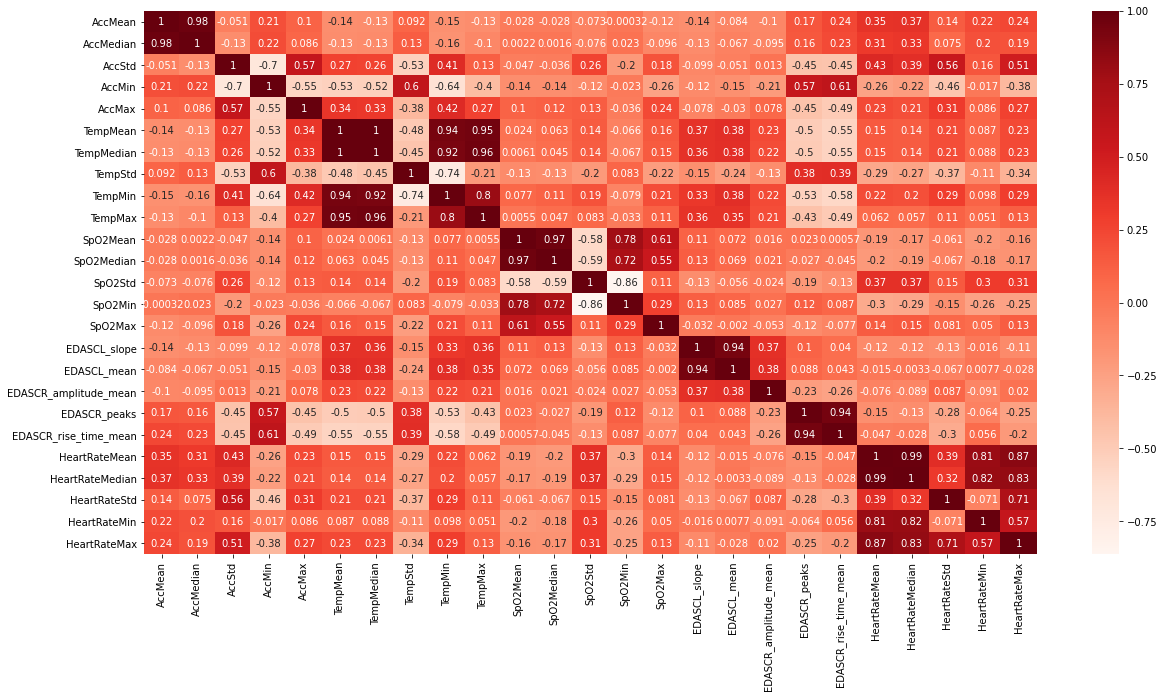

In [100]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

X = features.drop('Label', axis = 1)
X = X.drop('SubjectID', axis = 1)

cor = X.corr()
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Strongly correlated features that are removed

In [101]:
features = features.drop('TempMedian', axis = 1)
features = features.drop('AccMedian', axis = 1)
features = features.drop('SpO2Median', axis = 1)
features = features.drop('HeartRateMedian', axis = 1)

In [102]:
X = features.drop('Label', axis=1)
X = X.drop('SubjectID', axis=1)
y = features['Label']

In [103]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
print(X_train)  
print(y_train)

      AccMean    AccStd    AccMin    AccMax   TempMean   TempStd  TempMin  \
9    1.129547  0.081057  0.646993  1.860242  31.572020  0.324036     30.8   
2    1.156814  0.123338  0.521632  2.119929  32.514971  0.138124     32.2   
136  1.190926  0.032385  0.814494  1.735627  29.066722  1.177078     26.4   
134  1.050389  0.074425  0.579483  2.016978  33.958466  0.737046     31.8   
24   1.104552  0.004335  1.084528  1.126854  29.882585  1.635631     27.0   
..        ...       ...       ...       ...        ...       ...      ...   
70   1.044383  0.053420  0.374433  1.933313  32.519782  0.126447     32.2   
93   1.160805  0.072752  0.637024  2.086289  30.708831  0.132241     30.4   
73   1.192342  0.004959  1.169829  1.214496  29.517534  1.159607     27.0   
98   1.123370  0.117474  0.590339  2.665277  32.087257  0.114885     31.8   
8    1.053937  0.065045  0.601664  1.889894  33.011516  0.357463     31.8   

     TempMax   SpO2Mean   SpO2Std  ...  SpO2Max  EDASCL_slope  EDASCL_mean 

### Automated feature selection with sklearn

In [105]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

sklearn_selector = RFE(rfc, n_features_to_select=6)
X_trans = sklearn_selector.fit_transform(X_train, y_train)

print("Ranking: ", sklearn_selector.ranking_)  # check ranking of features

selected_features = pd.DataFrame({'Feature': list(X_train.columns),
                                     'Ranking': sklearn_selector.ranking_})

print("Selected Features")
print(selected_features.sort_values(by='Ranking').head(n=6))

X_important_train = sklearn_selector.transform(np.array(X_train))
X_important_test = sklearn_selector.transform(np.array(X_test))


rf_sklearn = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf_sklearn.fit(X_important_train, y_train)

print("Accuracy Score")
accuracy_score(y_test, rf_sklearn.predict(X_important_test))

Ranking:  [10  1  3  6  2  1  1 11  9 13 15 16  8 12  5  7  1  4  1 14  1]
Selected Features
                  Feature  Ranking
20           HeartRateMax        1
1                  AccStd        1
5                 TempStd        1
6                 TempMin        1
18           HeartRateStd        1
16  EDASCR_rise_time_mean        1
Accuracy Score


0.9375